In [8]:
import numpy as np
a = 6
v = np.array([4,5,6,3])
print(v[1])

5


In [4]:
m = np.array([[1,2,3],[4,5,6]])
print(m.shape)

(2, 3)


In [14]:
import numpy.linalg as la

In [11]:
n = np.array([[1,2],[3,4],[5,6]])
y = np.dot(m,n)
print(y.shape)

(2, 2)


In [26]:
a = np.array([[4,2],[6,3]])

#u = np.linalg.det(a)
u = la.det(a)
r = la.matrix_rank(a)
inv = la.inv(a)

LinAlgError: Singular matrix

In [25]:
print(inv)

[[ 0.4375 -0.125 ]
 [-0.375   0.25  ]]


In [29]:
A = np.array([[2,3],[5,2]])
b = np.array([6,-4])

#X = np.linalg.inv(A).dot(b)
X = np.linalg.solve(A,b)
print(X)

[-2.18181818  3.45454545]


In [30]:
print(v)

[4 5 6 3]


In [31]:
N1 = np.linalg.norm(v,1)
N2 = np.linalg.norm(v,2)
print(N1)
print(N2)

18.0
9.273618495495704


In [32]:
print(A)

[[2 3]
 [5 2]]


In [34]:
N1 = np.linalg.norm(A,1)
N2 = np.linalg.norm(A,2)
NF = np.linalg.norm(A,'fro')
print(N1)
print(N2)
print(NF)

7.0
6.23606797749979
6.48074069840786


In [35]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(A.shape)

(3, 3)


In [36]:
Eval, Evec = la.eig(A)
print(Eval)
print(Evec)

[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]


In [40]:
u1 = A.dot(Evec[:,1])
u2 = Eval[1]*Evec[:,1]
print(u1)
print(u2)

[ 0.87764976  0.09688771 -0.68387434]
[ 0.87764976  0.09688771 -0.68387434]


Linear Regression

In [41]:
# Y = 2X-3

x = np.array([4,8,3,-2,5])
y = np.array([6,12.5,3.5,-7.5,6])
n = len(x)
xi = np.sum(x)
yi = np.sum(y)
xi2 = np.sum(x**2)
xiyi = np.sum(x*y)

w1 = (n*xiyi-xi*yi)/(n*xi2-xi**2)
w0 = (yi-w1*xi)/n
print(w0,w1)

-3.0526315789473686 1.986842105263158


In [42]:
X = np.c_[np.ones(n),x]
print(X)

[[ 1.  4.]
 [ 1.  8.]
 [ 1.  3.]
 [ 1. -2.]
 [ 1.  5.]]


In [43]:
inv = la.inv(X.T.dot(X))
w = inv.dot(X.T).dot(y)
print(w)

[-3.05263158  1.98684211]


In [44]:
def RMSE(Y_pred,Y):
    return np.sqrt(np.mean((Y_pred-Y)**2))

In [45]:
y_pred = X.dot(w)
print(RMSE(y_pred,y))

0.7335924582060819


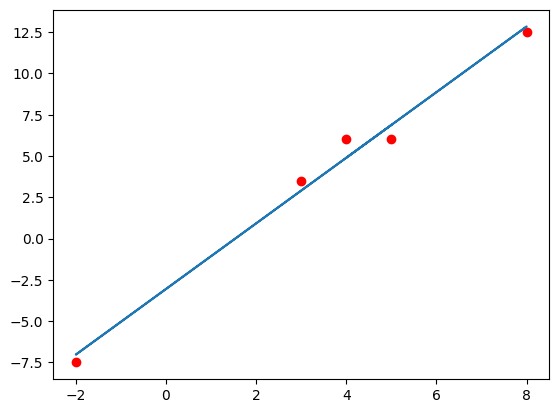

In [49]:
import matplotlib.pyplot as plt
#plt.plot(x,y,'o')
plt.scatter(x,y,color='red')
plt.plot(x,y_pred,'-')
plt.show()

In [68]:
x_poly = np.c_[np.ones(n)]
D = 3
for i in range(1,D+1):
  x_poly = np.c_[x_poly,x**i]
print(x_poly)

[[  1.   4.  16.  64.]
 [  1.   8.  64. 512.]
 [  1.   3.   9.  27.]
 [  1.  -2.   4.  -8.]
 [  1.   5.  25. 125.]]


In [69]:
w = la.inv(x_poly.T.dot(x_poly)).dot(x_poly.T).dot(y)
y_pred = x_poly.dot(w)
print(RMSE(y_pred,y))

0.46772145050275504


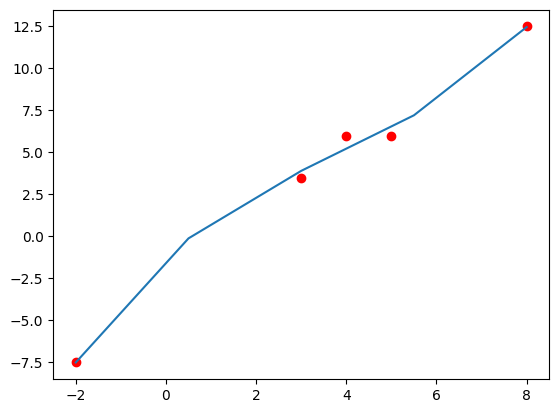

In [70]:
x_fit = np.linspace(np.min(x),np.max(x),n)
x_fit_poly = np.c_[np.ones(len(x_fit))]
for i in range(1,D+1):
  x_fit_poly = np.c_[x_fit_poly,x_fit**i]
y_fit = x_fit_poly.dot(w)
plt.scatter(x,y,color='red')
plt.plot(x_fit,y_fit,'-')